## Test result analysis

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

In [5]:
#ASM_results, SE_results, and PS_results are the results for assistant sales managers, sales executives, and sales representatives.  
ASM_results = pd.read_excel("/anaconda3/envs/ipykernel_py2/MDC Projects/assessment_results.xlsx", sheet_name=0, index_col=0)
SE_results = pd.read_excel("/anaconda3/envs/ipykernel_py2/MDC Projects/assessment_results.xlsx", sheet_name=1, index_col=0)
PSR_results = pd.read_excel("/anaconda3/envs/ipykernel_py2/MDC Projects/assessment_results.xlsx", sheet_name=2, index_col=0)


### Formatting the data

In [6]:
import re 

asm_index = ASM_results.index.tolist() 

match_by = 'Section'
asm_indices = []

for ind in asm_index: 
     if re.search(match_by, str(ind)): 
            asm_indices.append(asm_index.index(ind))


In [7]:
SE_index = SE_results.index.tolist() 
se_indices = []

for ind in SE_index: 
    if re.search(match_by, str(ind)): 
        se_indices.append(SE_index.index(ind))


In [8]:
ASM_psr_results = ASM_results.iloc[2:16,:] # These are the results for section A. 
ASM_se_results = ASM_results.iloc[16:31,:] # These are the results for section B. 
ASM_asm_results = ASM_results.iloc[31:,:] # These are the results for section C. 

SE_psr_results = SE_results.iloc[2:16,:] # These are the results for section A.
SE_se_results = SE_results.iloc[16:31,:] # These are the results for section B. 

PSR_results = PSR_results[1:] 


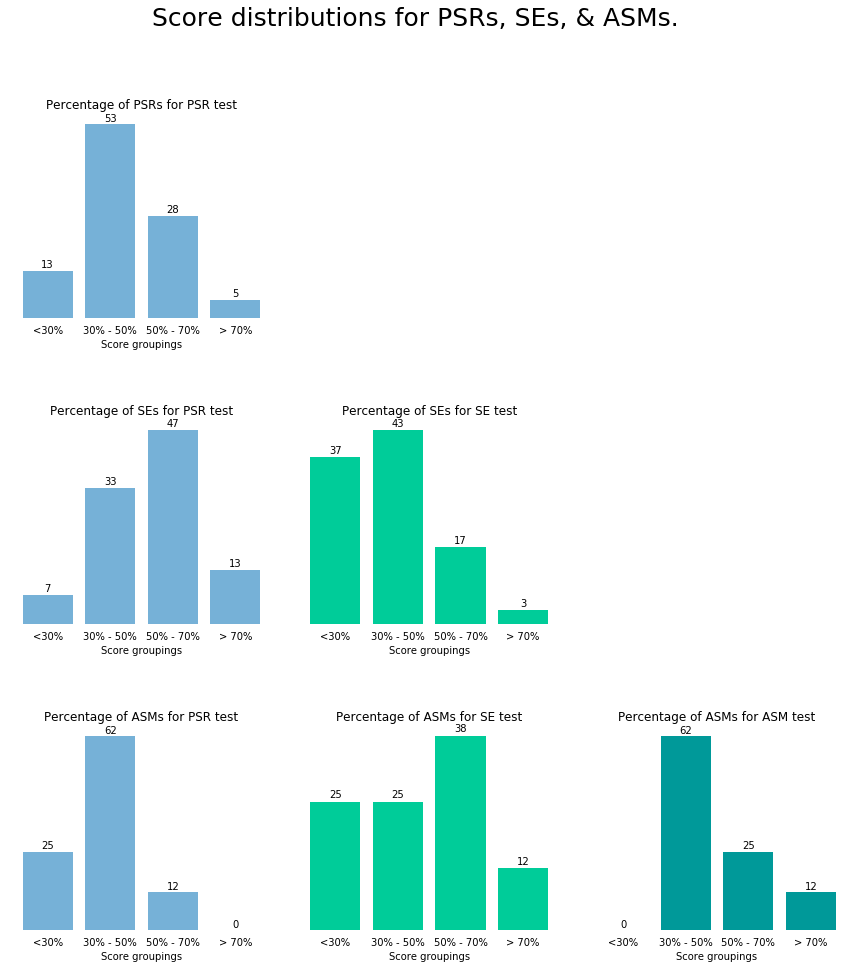

In [9]:

result_lists = [PSR_results, SE_psr_results, SE_se_results, ASM_psr_results, ASM_se_results, ASM_asm_results ]
plot_titles = ["Percentage of PSRs for PSR test", "Percentage of SEs for PSR test", "Percentage of SEs for SE test",
               "Percentage of ASMs for PSR test", "Percentage of ASMs for SE test", "Percentage of ASMs for ASM test" ]
color_list = ["#76B1D7", "#76B1D7", "#00cc99", "#76B1D7", "#00cc99", "#009999"]


fig = plt.figure(figsize=(15,15))
ax_1 = fig.add_subplot(3,3,1)
ax_2 = fig.add_subplot(3,3,4)
ax_3 = fig.add_subplot(3,3,5)
ax_4 = fig.add_subplot(3,3,7)
ax_5 = fig.add_subplot(3,3,8)
ax_6 = fig.add_subplot(3,3,9)

all_axes = [ax_1, ax_2, ax_3, ax_4, ax_5, ax_6]

curr_index = 0 

for result in result_lists: 
    result = result.transpose()
    
    if curr_index == 3: # Manually changing 44,26 to 44.26 in the ASM's PSR test. 
        result["%"][0] = 0 
        result["%"][6] = 44.26
    
    result_total_cand = len(result["%"])  

    below_30 = 0 
    bw_30_50 = 0 
    bw_50_70 = 0 
    above_70 = 0 

    cand_counter = 0 
    for percent in result["%"]:         
        
        if percent < 30:
            below_30 += 1 
            
        elif 30 <= percent < 50:
            bw_30_50 += 1

        elif 50 <= percent < 70: 
            bw_50_70 += 1 
            
        else: 
            above_70 += 1 
        cand_counter += 1 
   
    below_30 = round((below_30 /  result_total_cand) * 100) 
    bw_30_50 = round((bw_30_50 /  result_total_cand) * 100)
    bw_50_70 = round((bw_50_70 /  result_total_cand) * 100)
    above_70 = round((above_70 /  result_total_cand) * 100)
                
    all_axes[curr_index].bar([1,2,3,4], [below_30, bw_30_50, bw_50_70, above_70],color=color_list[curr_index], tick_label = ["<30%", "30% - 50%", "50% - 70%", "> 70%"])
    all_axes[curr_index].set_xlabel("Score groupings")
    all_axes[curr_index].set_title(plot_titles[curr_index]) # Change this 
    all_axes[curr_index].spines["top"].set_visible(False)
    all_axes[curr_index].spines["right"].set_visible(False)
    all_axes[curr_index].spines["left"].set_visible(False)
    all_axes[curr_index].spines["bottom"].set_visible(False)
    all_axes[curr_index].tick_params(bottom=False)
    all_axes[curr_index].tick_params(left=False)
    all_axes[curr_index].yaxis.set_ticklabels([])
    
    
    labels = [below_30, bw_30_50, bw_50_70, above_70]
    rects = all_axes[curr_index].patches


    for label, rect in zip(labels,rects):
        height = rect.get_height()
        all_axes[curr_index].text(rect.get_x() + rect.get_width() / 2, height + 0.9, label, ha='center')
        
    curr_index += 1 


plt.subplots_adjust(wspace=0.1, hspace=0.5)
fig.suptitle("Score distributions for PSRs, SEs, & ASMs.", fontsize=25)
plt.savefig("/anaconda3/envs/ipykernel_py2/MDC Projects/kkt_anlys_score_dist.jpeg")
